In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve


import warnings
warnings.filterwarnings("ignore")

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [49]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [50]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Age: Age of the patient
Sex: Sex of the patient
exang: exercise induced angina (1 = yes; 0 = no)
ca: number of major vessels (0-3)
cp: Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps: resting blood pressure (in mm Hg)
chol: cholestoral in mg/dl fetched via BMI sensor
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
rest_ecg: resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
target: 0= less chance of heart attack 1= more chance of heart attack

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [53]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [54]:
for i in list(df.columns):
    print("{}---{}".format(i,df[i].value_counts().shape[0]))

age---41
sex---2
cp---4
trtbps---49
chol---152
fbs---2
restecg---3
thalachh---91
exng---2
oldpeak---40
slp---3
caa---5
thall---4
output---2


<AxesSubplot:xlabel='sex', ylabel='count'>

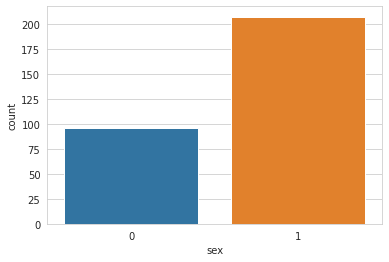

In [55]:
sns.countplot(df['sex'])

<AxesSubplot:xlabel='output', ylabel='count'>

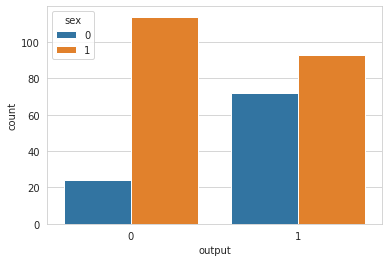

In [56]:
sns.countplot(df['output'],hue='sex',data=df)

<AxesSubplot:xlabel='thalachh', ylabel='Density'>

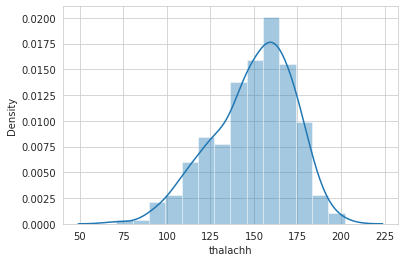

In [57]:
sns.distplot(df['thalachh'])

<AxesSubplot:xlabel='thalachh'>

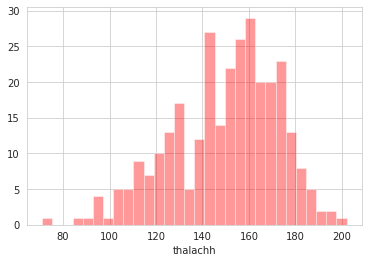

In [58]:

# set the background style of the plot
sns.set_style('whitegrid')
sns.distplot(df['thalachh'], kde = False, color ='red', bins = 30)

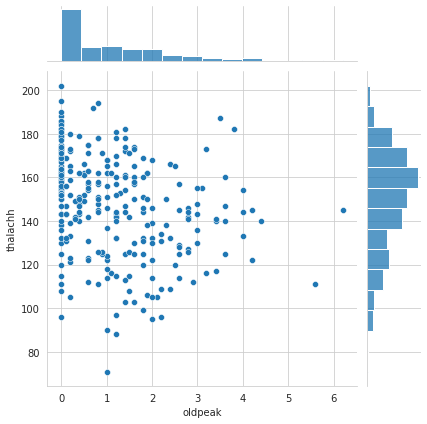

In [59]:

sns.jointplot(x ='oldpeak', y ='thalachh', data = df) 

In [60]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


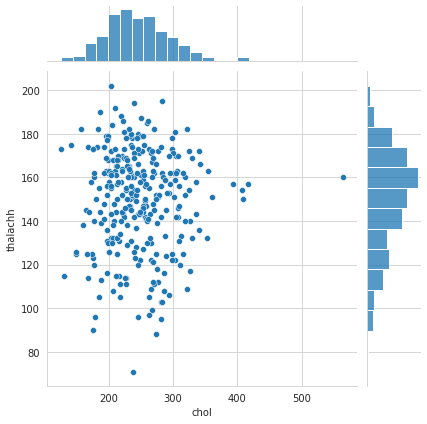

In [68]:
sns.jointplot(x ='chol', y ='thalachh', data = df) 

In [69]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]

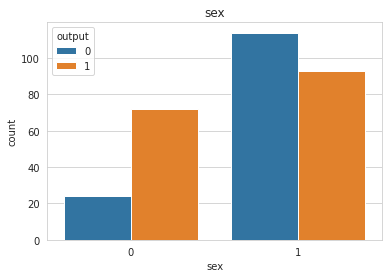

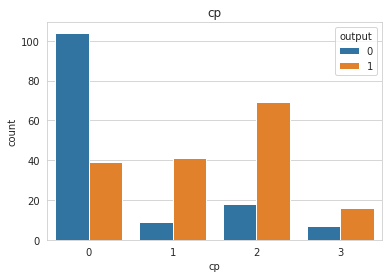

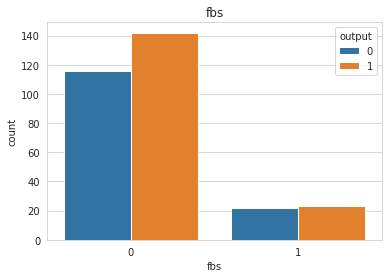

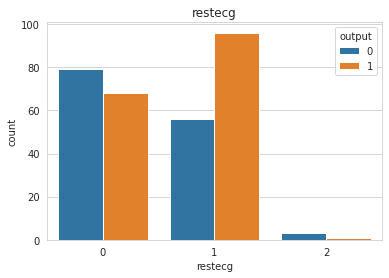

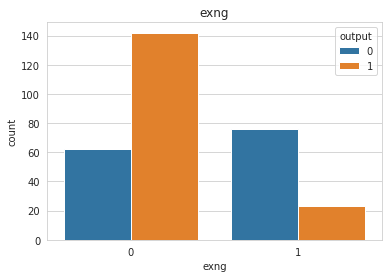

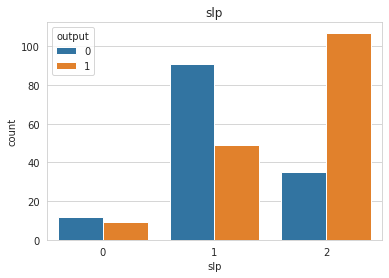

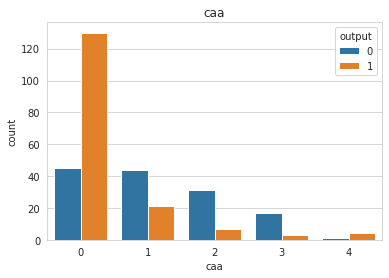

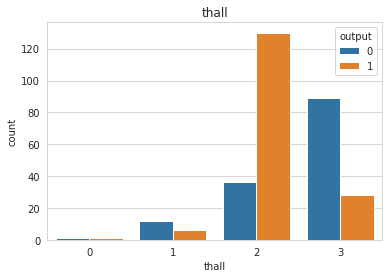

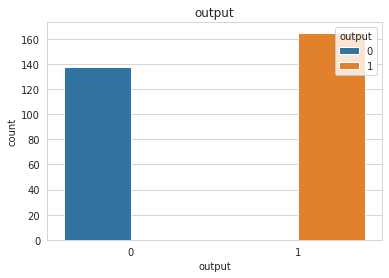

In [70]:
df_categoric = df.loc[:,categorical_list]
for i in  df_categoric:
    plt.figure()
    sns.countplot(x=i,data=df_categoric,hue='output')
    plt.title(i)

In [71]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]
df_numeric = df.loc[:,numeric_list]
sns.pairplot(numeric_list, hue = "output", diag_kind = "kde")

TypeError: 'data' must be pandas DataFrame object, not: <class 'list'>

In [72]:
#standardization
#future baglı olarak görsel açıdan anlamsız  bilgi çıkmamasını engellemek,machine öğrenmesini optimize etmek

scaler = StandardScaler()
scaler

StandardScaler()

In [73]:
numeric_list

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

In [74]:
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])

In [75]:
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [76]:
df_dummy = pd.DataFrame(scaled_array,columns= numeric_list[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [77]:
data_melted = pd.melt(df_dummy, var_name = "features", value_name = "value")
data_melted.head(20)

,features,value
0,age,0.952197
1,age,-1.915313
2,age,-1.474158
3,age,0.180175
4,age,0.290464
5,age,0.290464
6,age,0.180175
7,age,-1.143291
8,age,-0.260980
9,age,0.290464


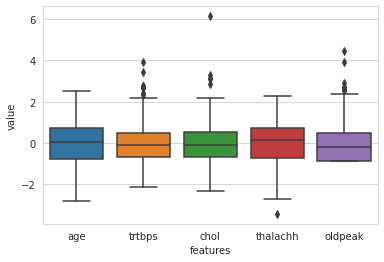

In [78]:
# box plot
plt.figure()
sns.boxplot(x = "features", y = "value", data= data_melted)
plt.show()

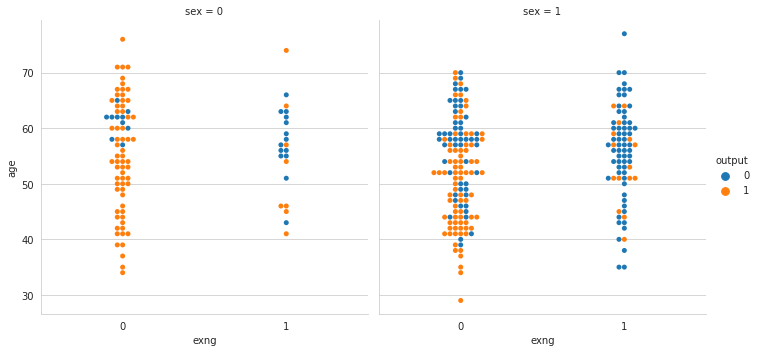

In [79]:
sns.catplot(x = "exng", y = "age", hue = "output", col = "sex", kind = "swarm", data = df)
plt.show()

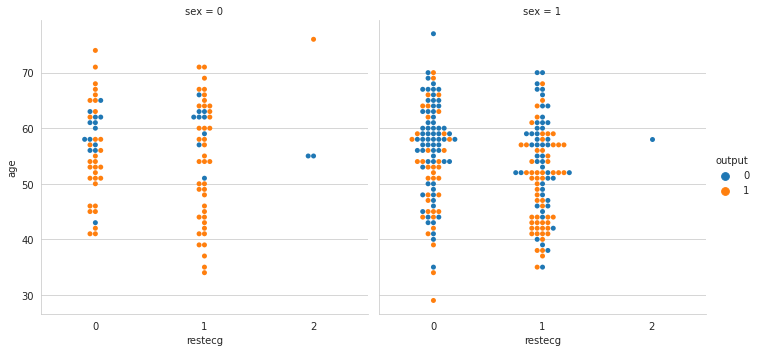

In [80]:
sns.catplot(x='restecg',y='age',hue='output',col='sex',kind='swarm',data=df)

In [81]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


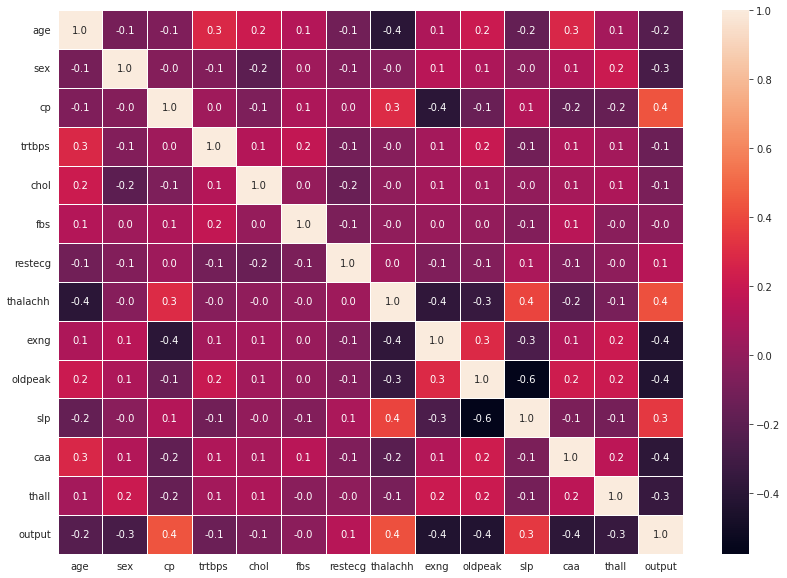

In [82]:
#dogru orantılı ve ters orantılı öğrenebiliriz kalp agrısı kalp krizi dogru orantılı ---baglantılı mı ?

plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

In [83]:
#aykırı değer bulma


numeric_list = ["age", "trtbps","chol","thalachh","oldpeak"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [84]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [85]:
for i in numeric_list:
     Q1 = np.percentile(df.loc[:, i],25)
     Q3 = np.percentile(df.loc[:,i],75)
     IQR = Q3 - Q1
     print("Old shape: ", df.loc[:, i].shape)
     upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))
     lower = np.where(df.loc[:,i]<=(Q1 - 2.5*IQR))
     print("{} -- {}".format(upper, lower))

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
Old shape:  (303,)
(array([223, 248]),) -- (array([], dtype=int64),)
Old shape:  (303,)
(array([85]),) -- (array([], dtype=int64),)
Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
Old shape:  (303,)
(array([204, 221]),) -- (array([], dtype=int64),)


In [86]:
upper

(array([204, 221]),)

In [87]:
df1 = df.copy()

In [88]:
#encoding categorical get_dummies
df1 = pd.get_dummies(df1, columns = categorical_list[:-1], drop_first = True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [90]:
X = df1.drop(["output"], axis = 1)
y = df1[["output"]]

In [91]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [92]:
scaler = StandardScaler()
scaler

StandardScaler()

In [95]:

X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])
X.head()


,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [96]:
#TRAİN /TEST VERİ SETİ

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (272, 22)
X_test: (31, 22)
y_train: (272, 1)
y_test: (31, 1)


In [97]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [98]:
# fitting = training
logreg.fit(X_train, y_train)

LogisticRegression()

In [99]:
# calculate probabilities
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

array([[0.67720207, 0.32279793],
       [0.03688291, 0.96311709],
       [0.21913405, 0.78086595],
       [0.0573998 , 0.9426002 ],
       [0.27066889, 0.72933111],
       [0.01053557, 0.98946443],
       [0.97692279, 0.02307721],
       [0.98591244, 0.01408756],
       [0.21745179, 0.78254821],
       [0.08514678, 0.91485322],
       [0.9168931 , 0.0831069 ],
       [0.73065488, 0.26934512],
       [0.54305303, 0.45694697],
       [0.96470461, 0.03529539],
       [0.93977935, 0.06022065],
       [0.19380872, 0.80619128],
       [0.1794896 , 0.8205104 ],
       [0.58911445, 0.41088555],
       [0.04006706, 0.95993294],
       [0.09582849, 0.90417151],
       [0.93331422, 0.06668578],
       [0.05105405, 0.94894595],
       [0.02965996, 0.97034004],
       [0.2180403 , 0.7819597 ],
       [0.08330696, 0.91669304],
       [0.02872862, 0.97127138],
       [0.01143452, 0.98856548],
       [0.32946634, 0.67053366],
       [0.05144039, 0.94855961],
       [0.89939852, 0.10060148],
       [0.

In [100]:
y_pred = np.argmax(y_pred_prob, axis = 1)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1])

In [101]:
dummy_ = pd.DataFrame(y_pred_prob)
dummy_["y_pred"] = y_pred
dummy_.head()

,0,1,y_pred
0,0.677202,0.322798,0
1,0.036883,0.963117,1
2,0.219134,0.780866,1
3,0.057400,0.942600,1
4,0.270669,0.729331,1
